<a href="https://colab.research.google.com/github/amifra8uni/LabCMP/blob/main/Compton_Scattering_rahatlou_13_07_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Compton scattering
[Esame del 13 luglio 2021](https://github.com/rahatlou/CMP/blob/CMP2020/exams/20210713-cmp-text.pdf):
Cesium-137 is a radioactive isotope which decays via beta emission (half life of 30.2 years) to an excited metastable state of Barium $^{137m}$Ba. This state decays with a half-life of 153 seconds to the ground state $^{137}$Ba emitting a photon with energy $E_0 = 662$ KeV. The goal is to simulate the impact of Compton scattering on the $^{137}Cs$ energy spectrum.

1. Generate $10^6$ photons with initial energy $E_i=E_0$

In [ ]:
# Importo le librerie di cui ho bisogno
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files # Libreria per salvare i file

# Genero 10e6 fotoni
E_0 = np.full(int(1e6), fill_value = 662)

# Verifico di averli generati correttamente
if bool(len(E_0) == int(1e6)): print("Il vettore ha la stessa lunghezza\n")
else : print("La lunghezza è sbagliatan")  

Il vettore ha la stessa lunghezza



2. Assume that each photon has a 65% porbability of undergoing Compton scattering in the crystal
3. The energy $E_f$ of the photon after the scattering is given by
 $ E_f=\frac{E_i}{1+\left(\frac{E_i}{m_e}\right)\left(1-\cos\theta\right)}$
 where $m_e = 511$keV is the electron mass and $\theta$ is the photon scattering angle with respect to the initial directon.

In [ ]:
# Definisco la funzione che mi restituisce l'energia del fotone uscente in funzione dell'angolo
def E_Compton(E_i, theta):
  me = 511 # keV 
  return E_i/( 1+ E_i*(1-np.cos(theta))/me)

def Compton(E_i, numero_fotoni):
  prob = np.random.randint(low = 0, high=101, size=int(1e6), dtype=int)
  E_diff = [E_Compton(E_i, cos_generator_singolo()) for i in prob if i <= 65]
  E_Non_diff = [E_i for i in prob if i > 65]                    
  return E_diff, E_Non_diff

 4. The value of angle $\theta$ for each photon must be generated according to the angular distribution $1+\cos^2\theta$


In [ ]:
# Definisco una funzione che mi estrae un solo numero con la distibuzione
def cos_generator_singolo():
  x = np.random.uniform(low = -4/3, high = 4/3)
  return 2**(1/3)/(-3*x + np.sqrt(4 + 9*x*x))**(1/3) - (-3*x + np.sqrt(4 + 9*x*x))**(1/3)/2**(1/3)

5. Plot the distribution of generated $\cos\theta$ and store the plot as `costheta.pdf`

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

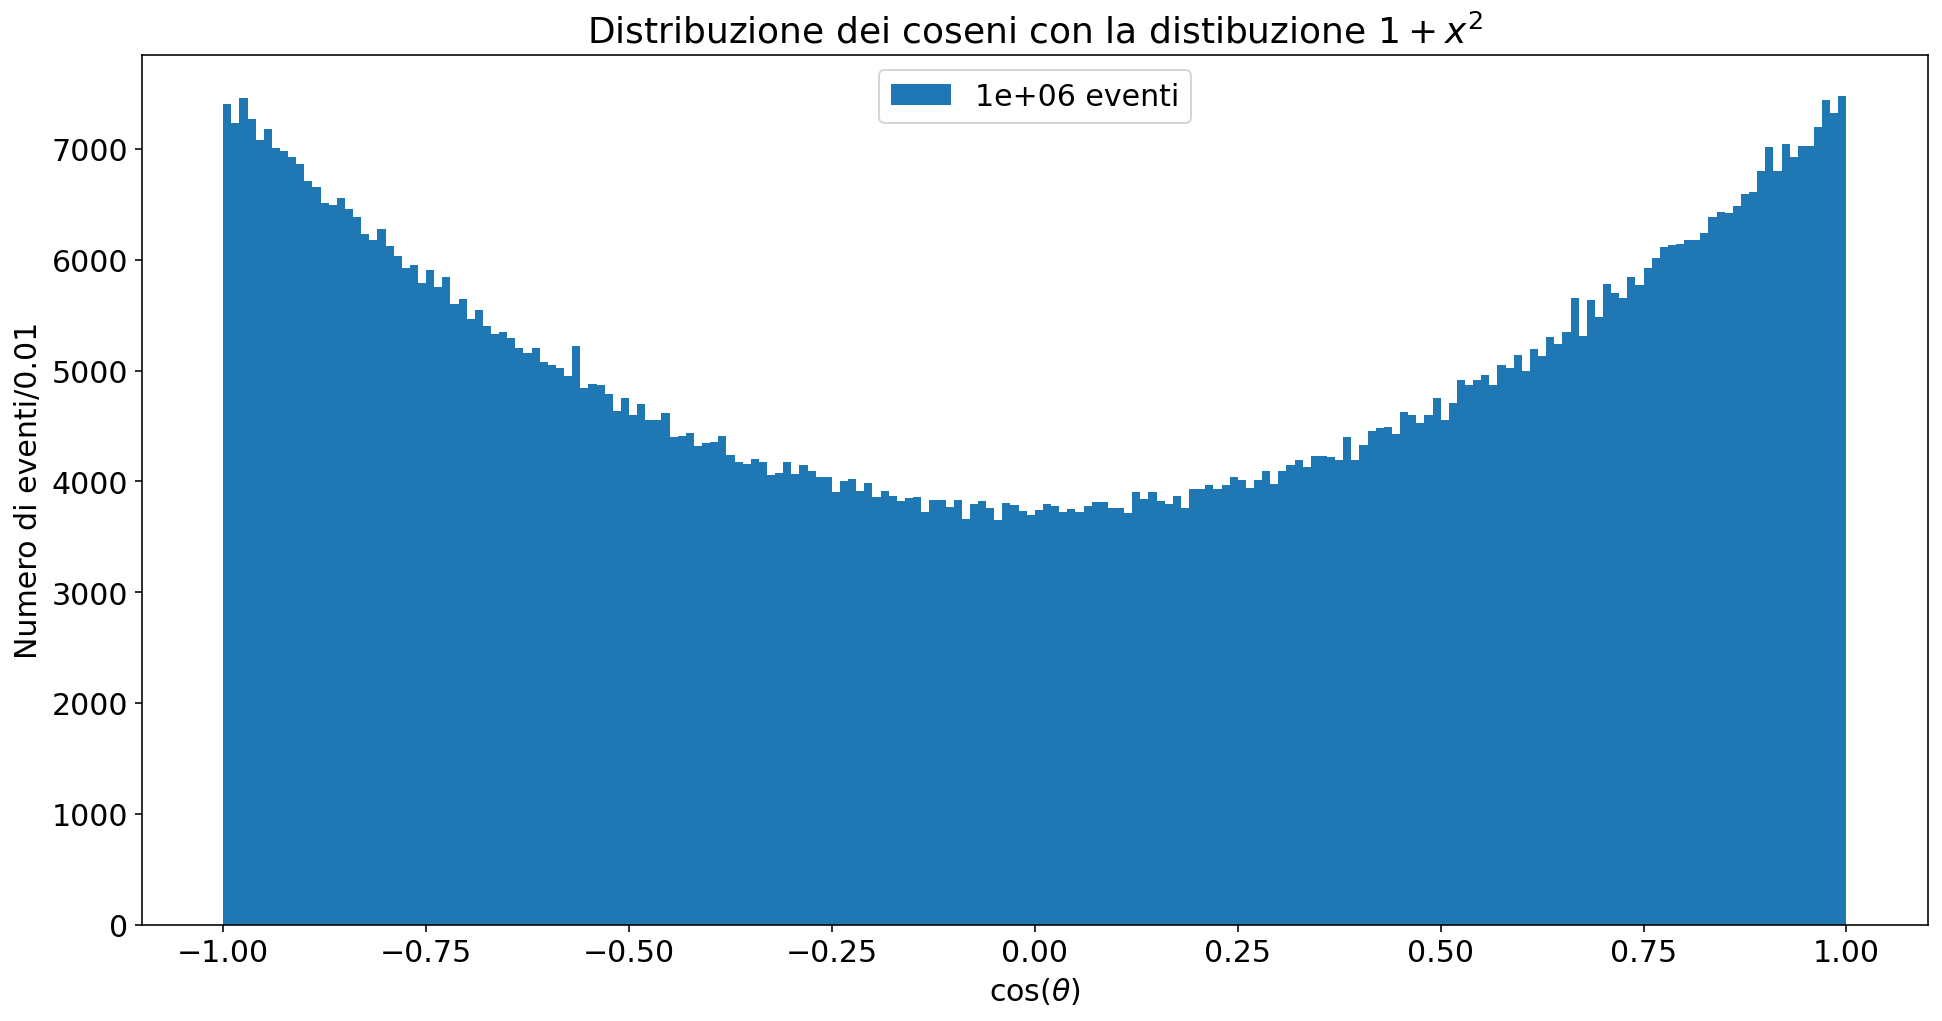

In [ ]:
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=15) 

theta = [cos_generator_singolo() for i in range(int(1e6))]
n_bin = 200
bin_width = 2/n_bin
Grafico_coseni = plt.figure(figsize=(16,8))

binned_data, bins, _ = plt.hist(theta, bins = n_bin, log = False, label = '%.e eventi'% (len(theta)))
plt.title(r'Distribuzione dei coseni con la distibuzione $1+x^2$')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('Numero di eventi/%.2f'%(bin_width))
plt.legend()

plt.savefig('costheta.pdf')

files.download('costheta.pdf')

6. Plot the distribution of $E_i$ for the scattered photons and store the plot as `compton-truth.pdf`





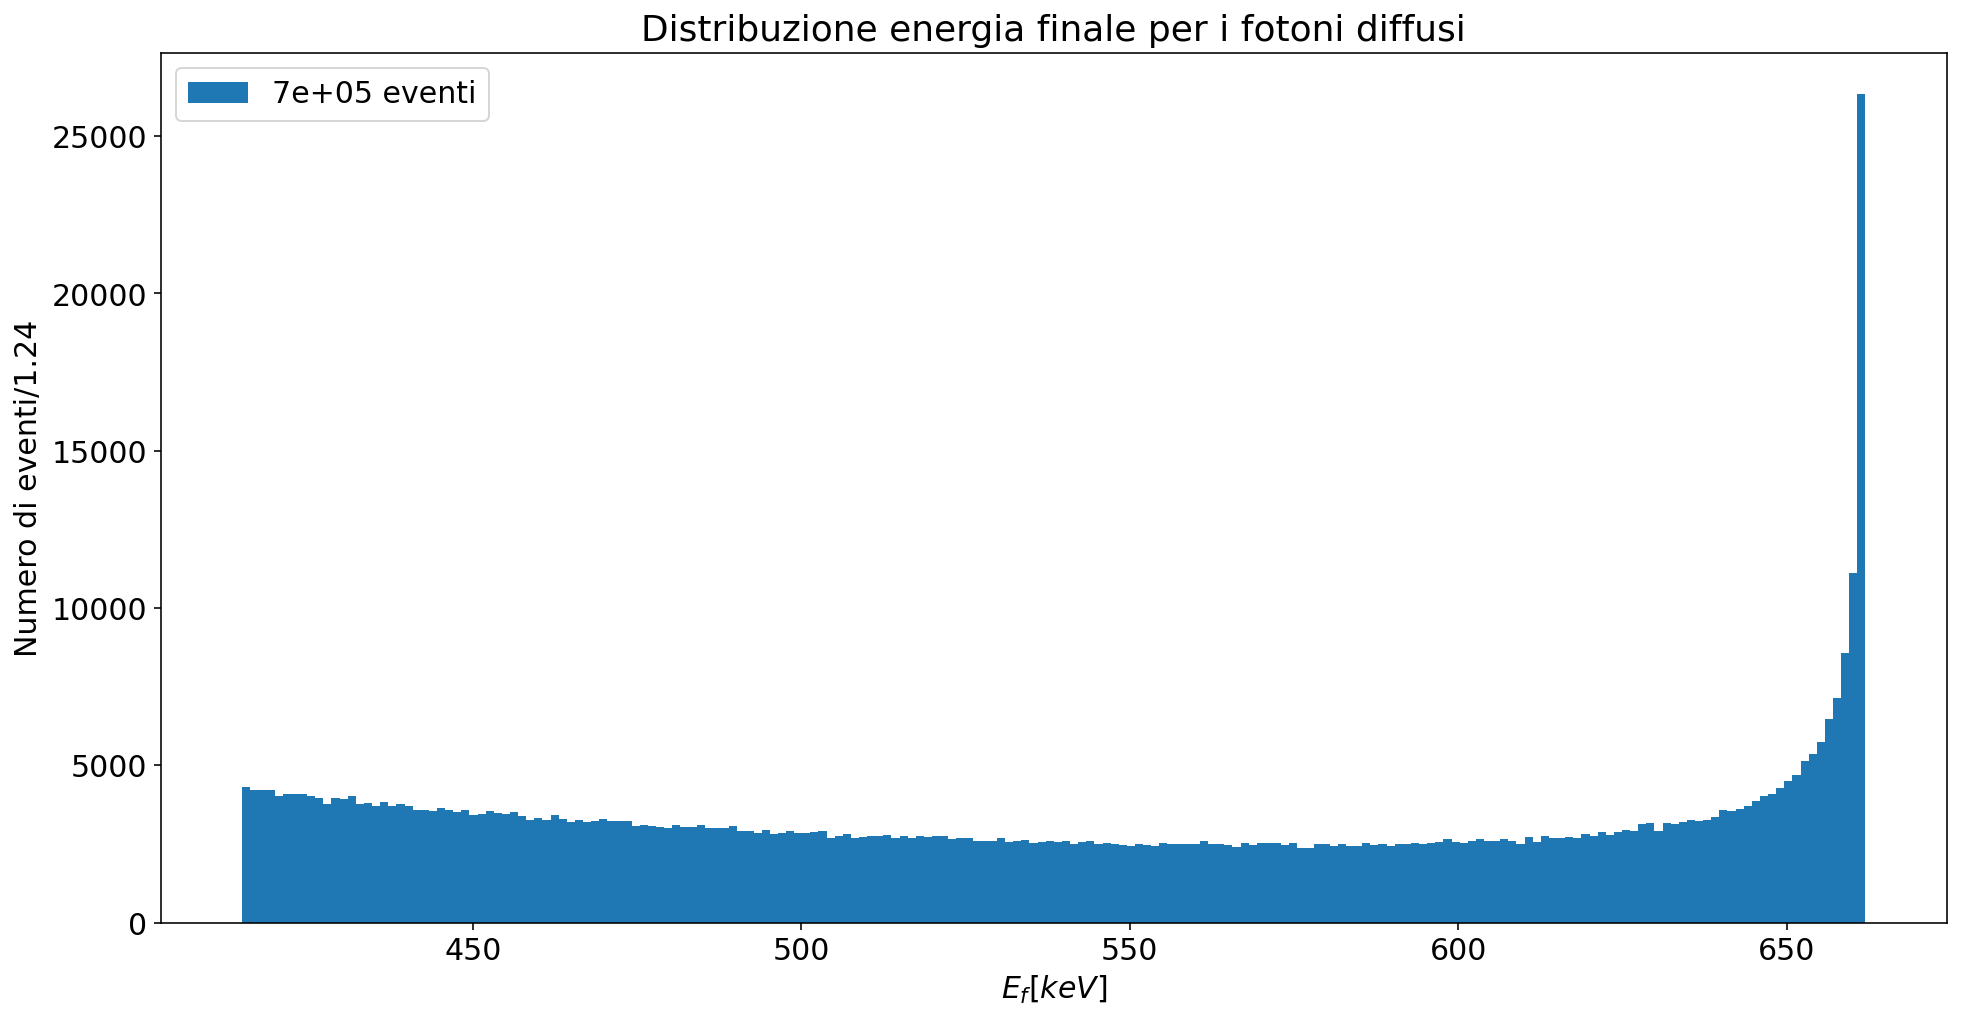

In [ ]:
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=15) 
plt.figure(figsize=(16,8))

E_diff, E_non_diff = Compton(662, int(1e6))
n_bin = 200
bin_width = (max(E_diff) - min(E_diff) )/n_bin
plt.title("Distribuzione energia finale per i fotoni diffusi")
plt.xlabel(r'$E_f [keV]$')
plt.ylabel('Numero di eventi/%.2f'%(bin_width))

binned_data, bins, _ = plt.hist(E_diff, bins = n_bin, log = False, label = '%.e eventi'% (len(E_diff)))
plt.legend()

7. The energy of the photon is measured with an NaI calorimeter. Simulate the behaviour assuming an energy resolution of 2.5% to provide the spectrum of the energgy spectrum of the observed photons.

In [ ]:
sigma = 0.025
E_diff_riv = [np.random.normal(i, i*sigma) for i in E_diff]
E_non_diff_riv = [np.random.normal(i, i*sigma) for i in E_non_diff]

8. Plot the distribution of measured energy $E_f$ for all photons (with and without Compton scattering) and store as `compton-truth.pdf`. Make sure reasonable binning are used for histograms and labels and units are added.
> * You shold see a peak around $E_0$ and a continuos distribution (a Fermi-Dirac shape) for $E_f < E_0$. (See the figure as an example)




 Two samples separately stored in NumPy arrays can be merged with [numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) as follows:

```python
data = np.concatenate((a,b))
```
with the first positional argument of the function being a tuple of numpy arrays.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

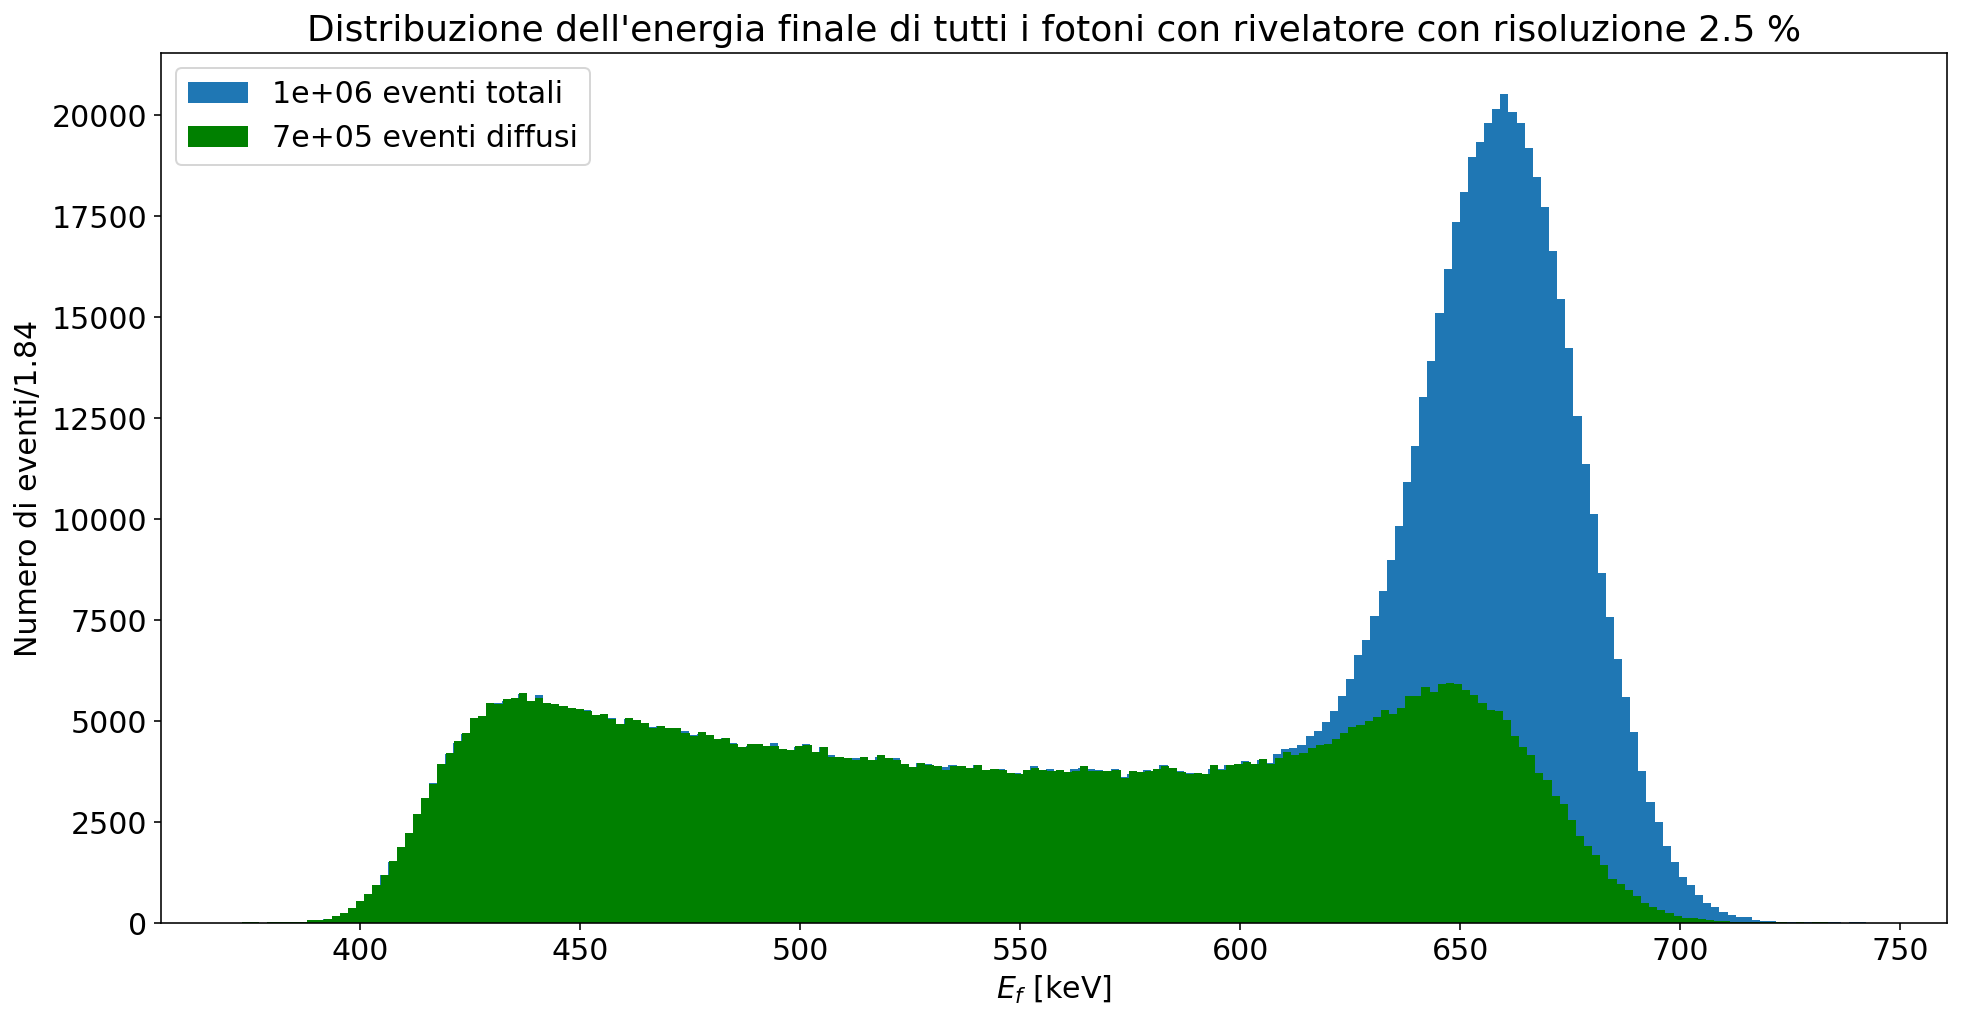

In [ ]:
%config InlineBackend.figure_format ='retina'
plt.rc('font', size=15) 
plt.figure(figsize=(16,8))

E_f = np.concatenate((E_diff_riv, E_non_diff_riv))
n_bin = 200
bin_width = (max(E_f) - min(E_f) )/n_bin
plt.title("Distribuzione dell'energia finale di tutti i fotoni con rivelatore con risoluzione %.1f %%" %(sigma*100))
plt.xlabel(r'$E_f$ [keV]')
plt.ylabel('Numero di eventi/%.2f'%(bin_width))
binned_data, bins, _ = plt.hist(E_f, bins = n_bin, log = False, label = '%.e eventi totali'% (len(E_f)))
n_bin_diff = (max(E_diff_riv) - min(E_diff_riv) )/bin_width
binned_data, bins, _ = plt.hist(E_diff_riv, bins = int(n_bin_diff), log = False, label = '%.e eventi diffusi'% (len(E_diff_riv)), facecolor='green')
plt.legend()

plt.savefig('compton-truth.pdf')
files.download('compton-truth.pdf')

# Il fatto che i valori massimi e minimi siano diversi pora a un diverso binnaggio e quindi le due figure non si sovrappongono perfettamente